<h4>The covid 19 dataset for Pakistani patients have been downloaded from Kaggle'</h4>

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
import pandas as pd 
covidpak = pd.read_csv('covid19_june_pak.csv')

<p>Lets explore the data first</p>

In [4]:
covidpak.head()

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
0,2/26/2020,1,0,0,China,Islamabad Capital Territory,Islamabad
1,2/26/2020,2,0,0,Iran/Taftan,Sindh,Karachi
2,2/29/2020,1,0,0,China,Islamabad Capital Territory,Islamabad
3,2/29/2020,1,0,0,Iran/Taftan,Sindh,Karachi
4,3/2/2020,1,0,0,Iran/Taftan,Gilgit-Baltistan,Gilgit


In [5]:
covidpak.tail()

,Date,Cases,Deaths,Recovered,Travel_history,Province,City
2793,5/30/2020,952,36,394,NaN,Punjab,Lahore
2794,5/31/2020,1184,22,120,NaN,Punjab,Lahore
2795,6/1/2020,1610,43,95,NaN,Punjab,Lahore
2796,6/2/2020,1639,30,353,NaN,Punjab,Lahore
2797,6/3/2020,1615,37,243,NaN,Punjab,Lahore


In [6]:
covidpak.shape

(2798, 7)

In [7]:
covidpak.columns

Index(['Date', 'Cases', 'Deaths', 'Recovered', 'Travel_history', 'Province',
       'City'],
      dtype='object')

In [8]:
covidpak.dtypes

Date              object
Cases              int64
Deaths             int64
Recovered          int64
Travel_history    object
Province          object
City              object
dtype: object

In [9]:
covidpak.describe()

,Cases,Deaths,Recovered
count,2798.000000,2798.000000,2798.000000
mean,30.016440,0.617584,8.847034
std,128.861666,2.716284,61.362566
min,0.000000,0.000000,-2.000000
25%,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000
75%,9.000000,0.000000,1.000000
max,1639.000000,43.000000,1431.000000


<h4>Data Visualization</h4>

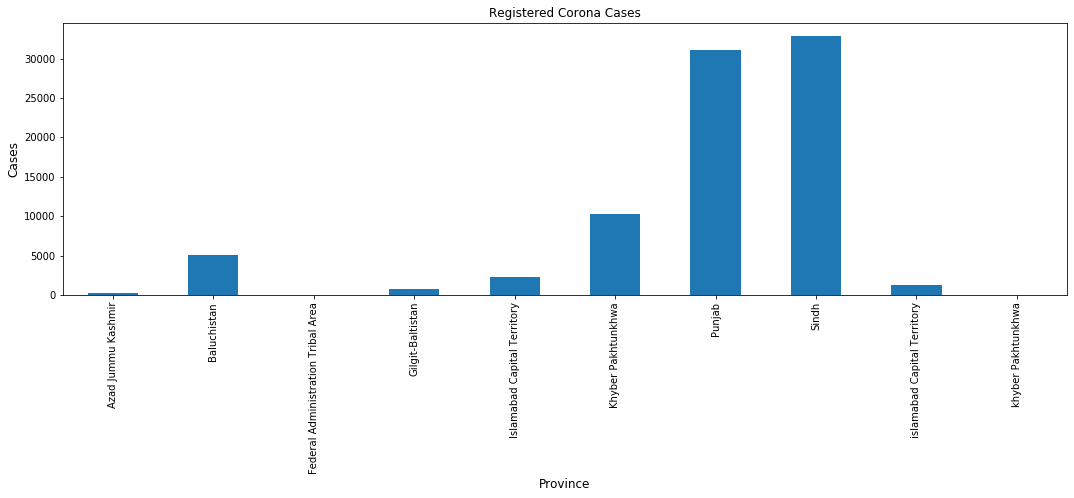

In [9]:
graph = covidpak.groupby('Province')['Cases'].sum().sort_index().plot(kind='bar',figsize=(18,5))
graph.set_xlabel('Province',fontsize=12)
graph.set_ylabel('Cases',fontsize=12)
graph.set_title('Registered Corona Cases',fontsize=12)
plt.show()

<h3>Here starts the data wrangling / preprocessing part which is the preliminary requirement for optimal data analysis</h3>
<p>Following steps are involved
<br>1. Finding missing values
<br>2. Changing data types of features, if require
<br>3. Encoding of data for categorical features</p>

In [10]:
covidpak.isnull().values.any()

True

In [13]:
covidpak.isnull().sum()

Date               0
Cases              0
Deaths             0
Recovered          0
Travel_history    36
Province           0
City               0
dtype: int64

In [12]:
col = ['Travel_history']

for c in col:
    mode = covidpak.Travel_history.mode()
    covidpak[c].fillna(mode)

In [15]:
#Lets remove the null values
covidpak.dropna(axis="rows", how="any", inplace = True)
covidpak.reset_index(drop=True, inplace=True)

In [16]:
covidpak['Province'].unique()

array(['Islamabad Capital Territory', 'Sindh', 'Gilgit-Baltistan',
       'Baluchistan', 'Punjab', 'Khyber Pakhtunkhwa',
       'khyber Pakhtunkhwa', 'Azad Jummu Kashmir',
       'Federal Administration Tribal Area',
       'islamabad Capital Territory'], dtype=object)

<h4>Encode values of Province</h4>

In [15]:
covidpak.Province [covidpak.Province == 'Islamabad Capital Territory']=1
covidpak.Province [covidpak.Province == 'islamabad Capital Territory']=1
covidpak.Province [covidpak.Province == 'Sindh'] = 2
covidpak.Province [covidpak.Province == 'Gilgit-Baltistan'] = 3
covidpak.Province [covidpak.Province == 'Baluchistan'] = 4
covidpak.Province [covidpak.Province == 'khyber Pakhtunkhwa']= 5
covidpak.Province [covidpak.Province == 'Khyber Pakhtunkhwa']= 5
covidpak.Province [covidpak.Province == 'Khyber'] = 5
covidpak.Province [covidpak.Province == 'Punjab'] = 6
covidpak.Province [covidpak.Province == 'Azad Jummu Kashmir'] = 7
covidpak.Province [covidpak.Province == 'Federal Administration Tribal Area'] = 9

C:\Users\adminpc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\adminpc\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\adminpc\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel packag

In [16]:
covidpak['Travel_history'].unique()

array(['China', 'Iran/Taftan', 'Unknown', 'Syria', 'UK',
       'Local - Social Contact', 'USA', 'KSA', 'Local - Covid Relative',
       'Dubai', 'International Passenger', 'Tableeghi Jamaat', 'Jail',
       'Afghanistan', 'India'], dtype=object)

In [17]:
covidpak.Travel_history [covidpak.Travel_history == 'China'] = 1
covidpak.Travel_history [covidpak.Travel_history == 'Iran/Taftan'] = 2
covidpak.Travel_history [covidpak.Travel_history == 'KSA'] = 3
covidpak.Travel_history [covidpak.Travel_history == 'Syria'] = 4
covidpak.Travel_history [covidpak.Travel_history == 'UK'] = 5
covidpak.Travel_history [covidpak.Travel_history == 'USA'] = 6
covidpak.Travel_history [covidpak.Travel_history == 'Dubai'] = 7
covidpak.Travel_history [covidpak.Travel_history == 'Tableeghi Jamaat'] = 8
covidpak.Travel_history [covidpak.Travel_history == 'Jail'] = 9
covidpak.Travel_history [covidpak.Travel_history == 'Afghanistan'] = 10
covidpak.Travel_history [covidpak.Travel_history == 'India'] = 11
covidpak.Travel_history [covidpak.Travel_history == 'International Passenger'] = 12
covidpak.Travel_history [covidpak.Travel_history == 'Local - Social Contact'] = 13
covidpak.Travel_history [covidpak.Travel_history == 'Local - Covid Relative'] = 14
covidpak.Travel_history [covidpak.Travel_history == 'Unknown'] = 15


C:\Users\adminpc\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\adminpc\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\adminpc\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel packag

In [18]:
covidpak['Province']

0       1
1       2
2       1
3       2
4       3
       ..
2757    7
2758    7
2759    7
2760    7
2761    7
Name: Province, Length: 2762, dtype: object

In [19]:
covidpak['Travel_history']

0        1
1        2
2        1
3        2
4        2
        ..
2757    13
2758    13
2759    13
2760    13
2761    13
Name: Travel_history, Length: 2762, dtype: object

In [20]:
covidpak.isnull().values.any()

False

In [21]:
#Converting the types according to our domain
col = ['Deaths','Cases','Recovered']

for c in col:
    covidpak[c] = covidpak[c].astype(int)

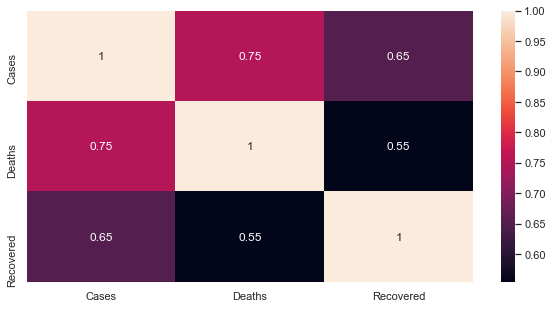

In [22]:
import seaborn as sns

corr = covidpak.corr()
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(corr, annot=True)

<h4>Splitting the data into train and test set</h4>

In [23]:
target_set = covidpak['Cases'] | covidpak['Deaths'] | covidpak['Recovered']

In [24]:
covidpak = covidpak.drop(columns=['Date'])

In [27]:
covidpak = covidpak.drop(columns=['City'])

<h4>Train and test splitting</h4>

In [28]:
from sklearn.model_selection import train_test_split

from sklearn import metrics
#Lets split the data into 60% training and 40% testing set
xtrain, xtest, ytrain, ytest = train_test_split(covidpak, target_set, test_size=0.4, random_state=1) 

In [29]:
from sklearn.preprocessing import MinMaxScaler


mscaler = MinMaxScaler()

# Lets input the independent data into the scaler
xtrain = mscaler.fit_transform(xtrain)
xtest = mscaler.fit_transform(xtest)

<h3>Classification</h3>

In [30]:
#Lets create two arrays to store results of classification model
names=[] 
scores=[]

In [ ]:
from sklearn.preprocessing import MinMaxScaler


mscaler = MinMaxScaler()

# Lets input the independent data into the scaler
xtrain = mscaler.fit_transform(xtrain)
xtest = mscaler.fit_transform(xtest)

<h4>Multiple Linear Regression</h4>

In [45]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(xtrain, ytrain)

ypred = linreg.predict(xtest)

print("Training accuracy :", linreg.score(xtrain, ytrain))
print("Testing accuracy :", linreg.score(xtest, ytest))

Training accuracy : 0.9714407550050432
Testing accuracy : 0.9601068089060244


In [47]:
names.append("Linear Regression")
scores.append(linreg.score(xtest,ytest))

<h4>Logistic Regression</h4>

In [50]:
from sklearn import preprocessing
labelencoding = preprocessing.LabelEncoder()

In [51]:
for i in list(covidpak.columns):
    covidpak[i] = labelencoding.fit_transform(covidpak[i])

In [52]:
from sklearn.linear_model import LogisticRegression

lreg = LogisticRegression()

lreg.fit(xtrain, ytrain)

ypred = lreg.predict(xtest)

print("Training accuracy :", lreg.score(xtrain, ytrain))
print("Testing accuracy :", lreg.score(xtest, ytest))

C:\Users\adminpc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training accuracy : 0.2395896197948099
Testing accuracy : 0.2515837104072398


In [ ]:
names.append("Logistic Reg.")
scores.append(lreg.score(xtest,ytest))

Text(0, 0.5, 'Method Score')

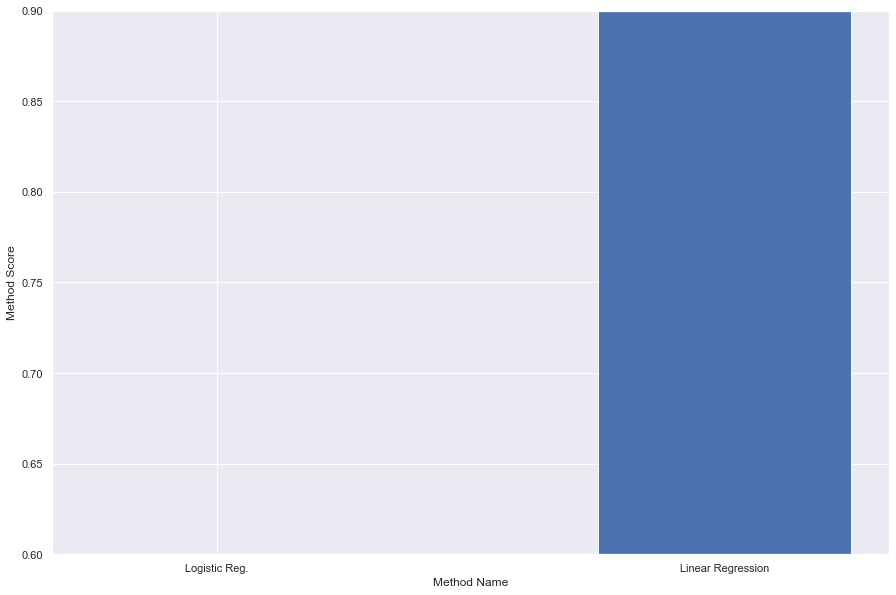

In [48]:
plt.figure(figsize=(15,10))
plt.ylim([0.60,0.90])
plt.bar(names,scores,width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Score')

<p>As we can clearly see that multiple linear regression performs much better than Logistic regression</p>